In [1]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, load_model, Model
from keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten, ZeroPadding2D, BatchNormalization, Activation, Add, Input, Dropout, GlobalAveragePooling2D
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [2]:
path_train = 'place the path'
path_valid = 'place the path'

Class: Strawberry___healthy || Number of images: 1824
Class: Grape___Black_rot || Number of images: 1888
Class: Potato___Early_blight || Number of images: 1939
Class: Blueberry___healthy || Number of images: 1816
Class: Corn_(maize)___healthy || Number of images: 1859
Class: Tomato___Target_Spot || Number of images: 1827
Class: Peach___healthy || Number of images: 1728
Class: Potato___Late_blight || Number of images: 1939
Class: Tomato___Late_blight || Number of images: 1851
Class: Tomato___Tomato_mosaic_virus || Number of images: 1790
Class: Pepper,_bell___healthy || Number of images: 1988
Class: Orange___Haunglongbing_(Citrus_greening) || Number of images: 2010
Class: Tomato___Leaf_Mold || Number of images: 1882
Class: Grape___Leaf_blight_(Isariopsis_Leaf_Spot) || Number of images: 1722
Class: Cherry_(including_sour)___Powdery_mildew || Number of images: 1683
Class: Apple___Cedar_apple_rust || Number of images: 1760
Class: Tomato___Bacterial_spot || Number of images: 1702
Class: Grap

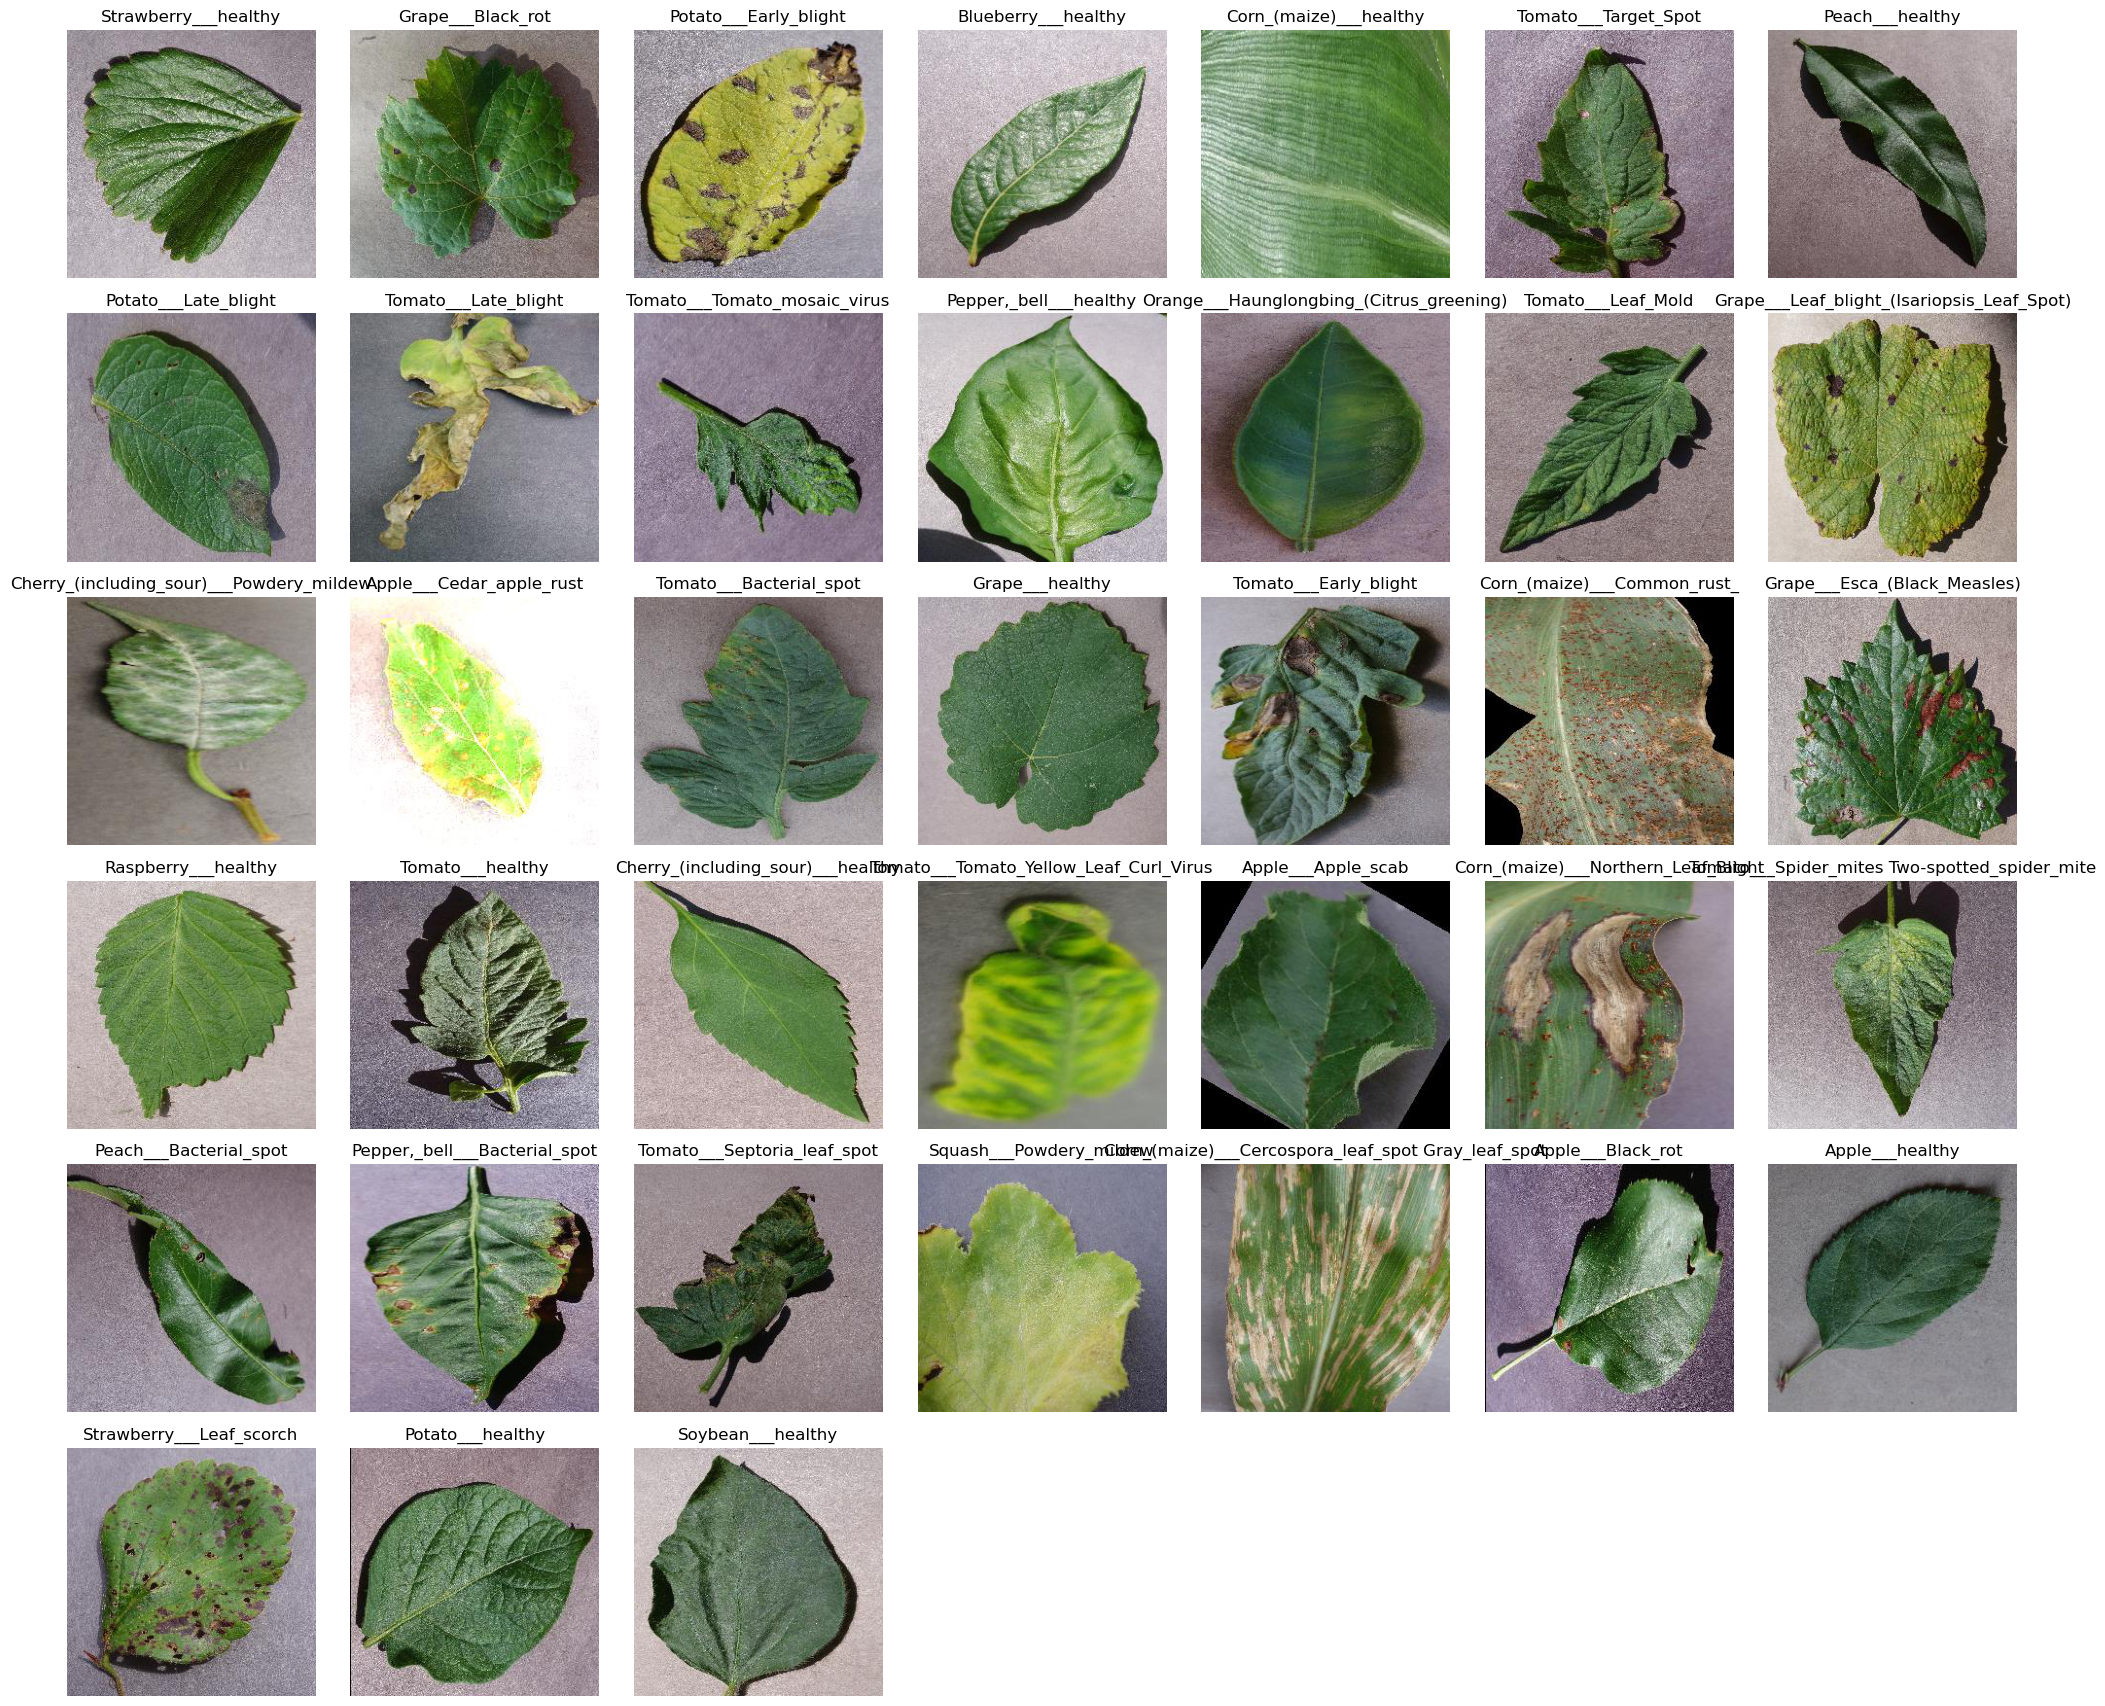

In [3]:
import os
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
count = 0
plant_names = []
total_images = 0

for class_name in os.listdir(path_train):
    class_path = os.path.join(path_train, class_name)
    
    # Only proceed if the item is a directory
    if os.path.isdir(class_path):
        count += 1
        plant_names.append(class_name)
        images_path = os.listdir(class_path)
        print(f"Class: {class_name} || Number of images: {len(images_path)}")
        total_images += len(images_path)

        plt.subplot(7, 7, count)
        image_show = plt.imread(os.path.join(class_path, images_path[0]))
        plt.imshow(image_show)
        plt.title(class_name)
        plt.axis('off')

print("Total number of images we have:", total_images)
plt.tight_layout()
plt.show()


In [3]:
import os

# Assuming path_train is defined with the path to your training directory
plant_names = []

for class_name in os.listdir(path_train):
    class_path = os.path.join(path_train, class_name)
    
    # Only proceed if the item is a directory
    if os.path.isdir(class_path):
        plant_names.append(class_name)

# Print all class names
print("Class Names:")
for name in plant_names:
    print(name)


Class Names:
Strawberry___healthy
Grape___Black_rot
Potato___Early_blight
Blueberry___healthy
Corn_(maize)___healthy
Tomato___Target_Spot
Peach___healthy
Potato___Late_blight
Tomato___Late_blight
Tomato___Tomato_mosaic_virus
Pepper,_bell___healthy
Orange___Haunglongbing_(Citrus_greening)
Tomato___Leaf_Mold
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
Cherry_(including_sour)___Powdery_mildew
Apple___Cedar_apple_rust
Tomato___Bacterial_spot
Grape___healthy
Tomato___Early_blight
Corn_(maize)___Common_rust_
Grape___Esca_(Black_Measles)
Raspberry___healthy
Tomato___healthy
Cherry_(including_sour)___healthy
Tomato___Tomato_Yellow_Leaf_Curl_Virus
Apple___Apple_scab
Corn_(maize)___Northern_Leaf_Blight
Tomato___Spider_mites Two-spotted_spider_mite
Peach___Bacterial_spot
Pepper,_bell___Bacterial_spot
Tomato___Septoria_leaf_spot
Squash___Powdery_mildew
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Apple___Black_rot
Apple___healthy
Strawberry___Leaf_scorch
Potato___healthy
Soybean___healthy


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

 
  
# Load the Training images with 20% of it as Validation.
training_set = image_dataset_from_directory(
    directory=path_train,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training'
)

 

Found 70295 files belonging to 38 classes.
Using 56236 files for training.


In [5]:
# Load the Validation images with the remaining 20%
validation_set = image_dataset_from_directory(
    directory= path_valid,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128,128),
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='validation'
)

 

Found 17572 files belonging to 38 classes.
Using 3514 files for validation.


In [6]:
from tensorflow.keras import models, layers
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(128,128, 3))

In [7]:
for layer in base_model.layers[:-5]:
    layer.trainable = False

In [9]:
num_classes=38

# Define the complete model
resnet50_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Build the model by calling it on a sample input
resnet50_model.build((None,  128,128, 3))

# Display the model summary
resnet50_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,122,022 (92.02 MB)

 Trainable params: 1,589,030 (6.06 MB)

 Non-trainable params: 22,532,992 (85.96 MB)

In [10]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

# Early Stopping
es = EarlyStopping(monitor='val_accuracy', verbose=1, patience=7)

# Model Checkpoint
mc = ModelCheckpoint(filepath='best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)  # Ensure the filepath ends with .keras

# Learning Rate Reduction
lr = ReduceLROnPlateau(monitor='val_accuracy', verbose=1, patience=5, min_lr=0.001)

In [11]:
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = resnet50_model.fit(
    training_set,
    validation_data=validation_set,
    epochs=5,  # Set to 10 epochs as per your requirement
    callbacks=[es, mc, lr]
)

Epoch 1/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.7237 - loss: 0.9819
Epoch 1: val_accuracy improved from -inf to 0.92686, saving model to best_model.keras
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 791s 449ms/step - accuracy: 0.7237 - loss: 0.9817 - val_accuracy: 0.9269 - val_loss: 0.2282 - learning_rate: 0.0010
Epoch 2/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9089 - loss: 0.2759
Epoch 2: val_accuracy improved from 0.92686 to 0.94849, saving model to best_model.keras
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 876s 498ms/step - accuracy: 0.9089 - loss: 0.2759 - val_accuracy: 0.9485 - val_loss: 0.1583 - learning_rate: 0.0010
Epoch 3/5
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - accuracy: 0.9329 - loss: 0.2004
Epoch 3: val_accuracy improved from 0.94849 to 0.95390, saving model to best_model.keras
1758/1758 ━━━━━━━━━━━━━━━━━━━━ 898s 511ms/step - accuracy: 0.9329 - loss: 0.2004 - val_accuracy: 0.9539 - val_loss: 0.1404 - learning_rate: 0.0010
Epoch 4/5
1758/1758 ━━━━━━━━

In [13]:
# Evaluate the model on the validation set
val_loss, val_accuracy = resnet50_model.evaluate(validation_set, verbose=1)
print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")


110/110 ━━━━━━━━━━━━━━━━━━━━ 46s 417ms/step - accuracy: 0.9640 - loss: 0.1177
Validation Loss: 0.1194, Validation Accuracy: 0.9647


In [16]:
# Evaluate the model on the validation set
train_loss, train_accuracy = resnet50_model.evaluate(training_set)

 

1758/1758 ━━━━━━━━━━━━━━━━━━━━ 810s 461ms/step - accuracy: 0.9879 - loss: 0.0362


In [17]:
print(f"Training Loss: {train_loss:.4f}, Training Accuracy: {train_accuracy:.4f}")


Training Loss: 0.0311, Training Accuracy: 0.9897


In [18]:
# Save the trained model
resnet50_model.save('resnet50_plant_disease_model.h5')
print("Model saved as 'resnet50_plant_disease_model.h5'")


Model saved as 'resnet50_plant_disease_model.h5'


In [19]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('resnet50_plant_disease_model.h5')
print("Model loaded successfully.")

Model loaded successfully.


In [21]:
# Initialize an empty list to store true labels and predicted classes
true_classes = []
predicted_classes = []

# Loop over the validation set to get images and true labels
for images, labels in validation_set:
    # Predict on batch
    batch_predictions = model.predict(images)
    batch_predicted_classes = np.argmax(batch_predictions, axis=1)
    batch_true_classes = np.argmax(labels, axis=1)  # True labels for the batch
    
    # Store predictions and true labels
    predicted_classes.extend(batch_predicted_classes)
    true_classes.extend(batch_true_classes)

# Convert lists to numpy arrays for evaluation
predicted_classes = np.array(predicted_classes)
true_classes = np.array(true_classes)

# Calculate accuracy
accuracy = np.mean(predicted_classes == true_classes)
print(f"Prediction Accuracy on validation set: {accuracy:.4f}")

# Display the first few predictions and their corresponding true labels
for i in range(5):  # Show first 5 predictions
    print(f"Predicted: {predicted_classes[i]}, True: {true_classes[i]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2024-11-02 13:36:00.139610: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


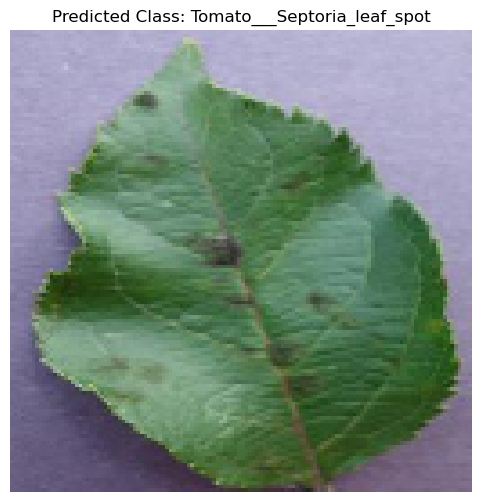

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Assuming 'plant_names' contains the class names in the same order as their indices
# You can use the same 'plant_names' list you populated earlier when loading images

def predict_single_image(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(128, 128))  # Use same target size as training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale like in training

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)
    return predicted_class[0], img

# Predict on a new image
image_path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'  # Replace with the path to your image
predicted_class_index, img = predict_single_image(image_path, model)

# Plot the image and its predicted class
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(f"Predicted Class: {plant_names[predicted_class_index]}")
plt.axis('off')
plt.show()


In [34]:
# Get true labels and predicted labels
y_true = []
y_pred = []

# Iterate through the validation dataset to get true labels
for images, labels in validation_set:
    y_true.extend(np.argmax(labels.numpy(), axis=-1))
    predictions = resnet50_model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=-1))

# Convert to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 930ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

2024-11-02 13:49:15.940092: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:

# Print classification report
print(classification_report(y_true, y_pred, target_names=validation_set.class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.96      0.98        91
                                 Apple___Black_rot       0.99      0.96      0.98       109
                          Apple___Cedar_apple_rust       0.98      0.99      0.98        85
                                   Apple___healthy       0.98      1.00      0.99       101
                               Blueberry___healthy       0.98      0.99      0.98        87
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98        77
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99        77
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.97      0.87      0.92        77
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99        80
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.97      0.

In [43]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load the saved model
model = load_model('resnet50_plant_disease_model.h5')
print("Model loaded successfully.")

# Load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128,128))  # Resize to the model's expected input size
    img_array = image.img_to_array(img)                      # Convert to array
    img_array = np.expand_dims(img_array, axis=0)           # Add batch dimension
    img_array = img_array / 255.0                            # Normalize the image
    return img_array

# Path to the image to be predicted
img_path = 'archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG'  # Replace with your image path

# Preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
predictions = model.predict(img_array)

# Assuming your model's output is categorical
predicted_class = np.argmax(predictions, axis=1)  # Get the index of the highest probability
print(f"Predicted class: {predicted_class[0]}")


Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
Predicted class: 30
